In [1]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)

In [2]:
import sweetviz as sv
from ydata_profiling import ProfileReport

In [3]:
# Check the employment Data table of CIC

sq = """select * from prj-prod-dataplatform.risk_credit_cic_data.employment_data;"""
employmentdata = client.query(sq).to_dataframe(progress_bar_type='tqdm')
print(f"The row and columns in prj-prod-dataplatform.risk_credit_cic_data.employment_data are:\t {employmentdata.shape}")

Job ID a506d024-4a22-4997-8af6-8b1bfd0942cb successfully executed: 100%|██████████|
Downloading: 100%|██████████|
The row and columns in prj-prod-dataplatform.risk_credit_cic_data.employment_data are:	 (255103, 21)


In [4]:
employmentdataEDA = sv.analyze(employmentdata)

                                             |          | [  0%]   00:00 -> (? left)

In [5]:
employmentdataEDA.show_html("Employment_Data_CIC.html")

Report Employment_Data_CIC.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
employmentdata.describe(include = 'all').T

,count,unique,top,freq
digitalLoanAccountId,255103,255098,dc2c1a1f-852f-4607-86cd-cbfe55102f64,2
crifApplicationId,255103,255098,tonik-bigloan-319760,2
customerId,255103,238456,1885213,9
processEngineGuid,255103,204512,9be21cf75100ec9fe03b3f154c42f1fe0bfc7364,30054
requestGuid,255103,255098,3a788380-39e3-11ee-9718-0242ace60010,2
LastUpdateDate,255103,1637,2022-10-20,8108
AnnualMonthlyIndicator,27092,2,M,16940
Currency,24244,1,PHP,24244
DateHiredFrom,8848,3297,2021-01-01,334
DateHiredTo,104,80,2019-07-01,7


In [7]:
profile = ProfileReport(employmentdata, title="EmploymentDataPandasProfilingReport", explorative=True)
# Save the report as an HTML file
profile.to_file("EmploymentDataPandasProfilingReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Convert 'LastUpdateDate' to datetime if it's not already
employmentdata['LastUpdateDate'] = pd.to_datetime(employmentdata['LastUpdateDate'])

# Find the minimum date
min_date = employmentdata['LastUpdateDate'].min()

# Find the maximum date
max_date = employmentdata['LastUpdateDate'].max()

print(f"Last update Date Minimum date: {min_date.strftime('%Y-%m-%d')}")
print(f"Last Unpdate Date Maximum date: {max_date.strftime('%Y-%m-%d')}")

Last update Date Minimum date: 2009-09-17
Last Unpdate Date Maximum date: 2024-07-24


In [10]:
# DateHiredFrom
employmentdata['DateHiredFrom'] = pd.to_datetime(employmentdata['DateHiredFrom'])

# Find the minimum date
min_date = employmentdata['DateHiredFrom'].min()

# Find the maximum date
max_date = employmentdata['DateHiredFrom'].max()

print(f"DateHiredFrom Minimum date: {min_date.strftime('%Y-%m-%d')}")
print(f"DateHiredFrom Maximum date: {max_date.strftime('%Y-%m-%d')}")

DateHiredFrom Minimum date: 1931-02-12
DateHiredFrom Maximum date: 2024-06-01


In [11]:
# DateHiredTo

employmentdata['DateHiredTo'] = pd.to_datetime(employmentdata['DateHiredTo'])

# Find the minimum date
min_date = employmentdata['DateHiredTo'].min()

# Find the maximum date
max_date = employmentdata['DateHiredTo'].max()

print(f"DateHiredTo Minimum date: {min_date.strftime('%Y-%m-%d')}")
print(f"DateHiredTo Maximum date: {max_date.strftime('%Y-%m-%d')}")

DateHiredTo Minimum date: 1995-01-01
DateHiredTo Maximum date: 2024-03-05


**Date hired from and date hired to can give us employment time line and we can see correlation with delinquency**

In [14]:
employmentdata['GrossIncome'].fillna('0')
employmentdata['GrossIncome'] = employmentdata['GrossIncome'].astype(np.float64)

C:\Users\DwaipayanChakroborti\AppData\Local\Temp\ipykernel_1344\1816968258.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts = sorted_data.groupby('IncomeBracket')['customerId'].nunique().sort_index()


IncomeBracket
0%-\n10%      2470
10%-\n20%     2210
20%-\n30%     2812
30%-\n40%     2094
40%-\n50%     2420
50%-\n60%     2026
60%-\n70%     2338
70%-\n80%     2339
80%-\n90%     2378
90%-\n100%    2299
Name: customerId, dtype: int64
0%-10%: $1.00 - $14000.00
10%-20%: $14000.00 - $18549.00
20%-30%: $18549.00 - $25000.00
30%-40%: $25000.00 - $35000.00
40%-50%: $35000.00 - $50000.00
50%-60%: $50000.00 - $129108.00
60%-70%: $129108.00 - $238391.50
70%-80%: $238391.50 - $296111.00
80%-90%: $296111.00 - $400000.00
90%-100%: $400000.00 - $9185214474.00


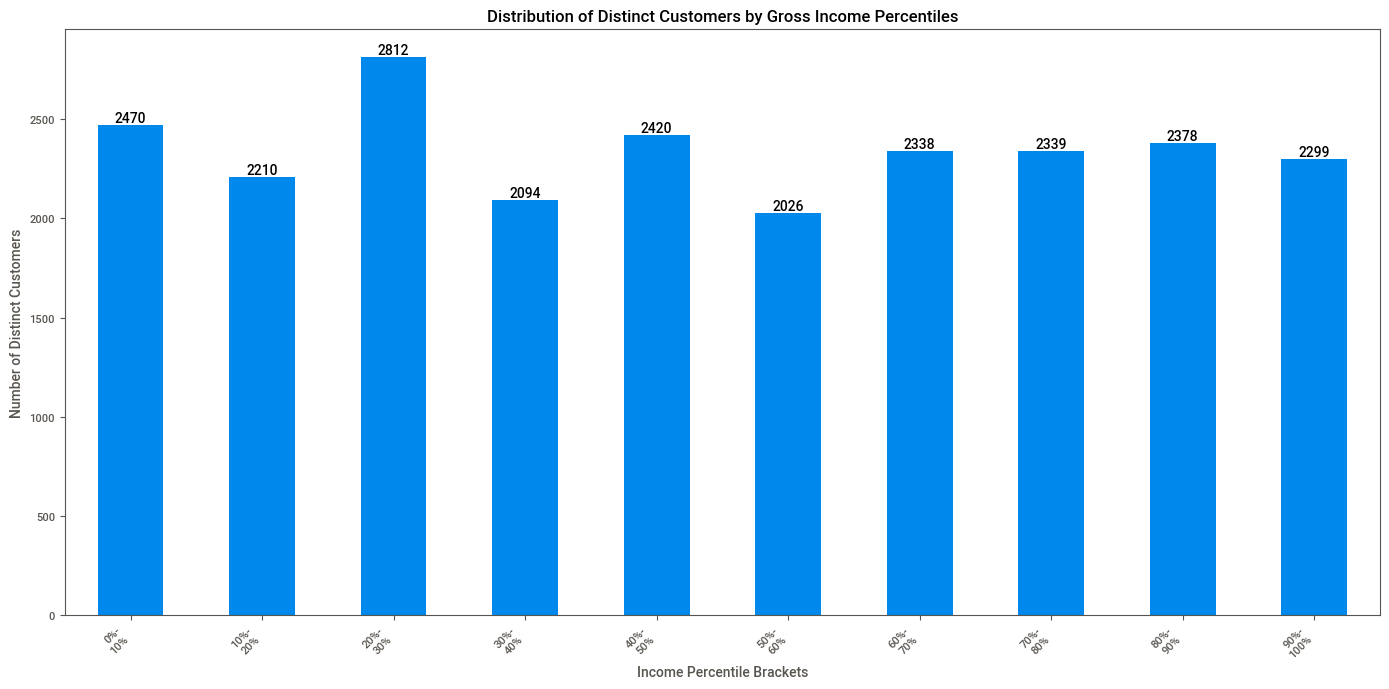

In [25]:
# Remove zeros from GrossIncome and drop duplicates based on CustomerId
sorted_data = employmentdata[employmentdata['GrossIncome'] > 0].drop_duplicates(subset='customerId')

# Calculate percentiles
num_brackets = 10
percentiles = np.linspace(0, 100, num_brackets + 1)
bins = np.percentile(sorted_data['GrossIncome'], percentiles)

# Create labels for the brackets
bracket_labels = [f"{percentiles[i]:.0f}%-\n{percentiles[i+1]:.0f}%" for i in range(num_brackets)]

# Assign income brackets
sorted_data['IncomeBracket'] = pd.cut(sorted_data['GrossIncome'], bins=bins, labels=bracket_labels, include_lowest=True)

# Count distinct customers in each bracket
customer_counts = sorted_data.groupby('IncomeBracket')['customerId'].nunique().sort_index()

# Create the plot
plt.figure(figsize=(14, 7))  # Increased figure size for better label visibility
ax = customer_counts.plot(kind='bar')
plt.title('Distribution of Distinct Customers by Gross Income Percentiles')
plt.xlabel('Income Percentile Brackets')
plt.ylabel('Number of Distinct Customers')
plt.xticks(rotation=45, ha='right')

# Add data labels
for i, v in enumerate(customer_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Save the plot as an SVG
plt.savefig('distinct_customers_income_distribution_percentiles.svg', format='svg')

# Print the actual counts
print(customer_counts)

# Print the income ranges for each percentile bracket
for i in range(num_brackets):
    print(f"{percentiles[i]:.0f}%-{percentiles[i+1]:.0f}%: ${bins[i]:.2f} - ${bins[i+1]:.2f}")

Total distinct income levels: 5345
Maximum customers at one income level: 951.0 (Income: 12000.00)
Minimum customers at one income level: 1.0 (Income: 14.00)


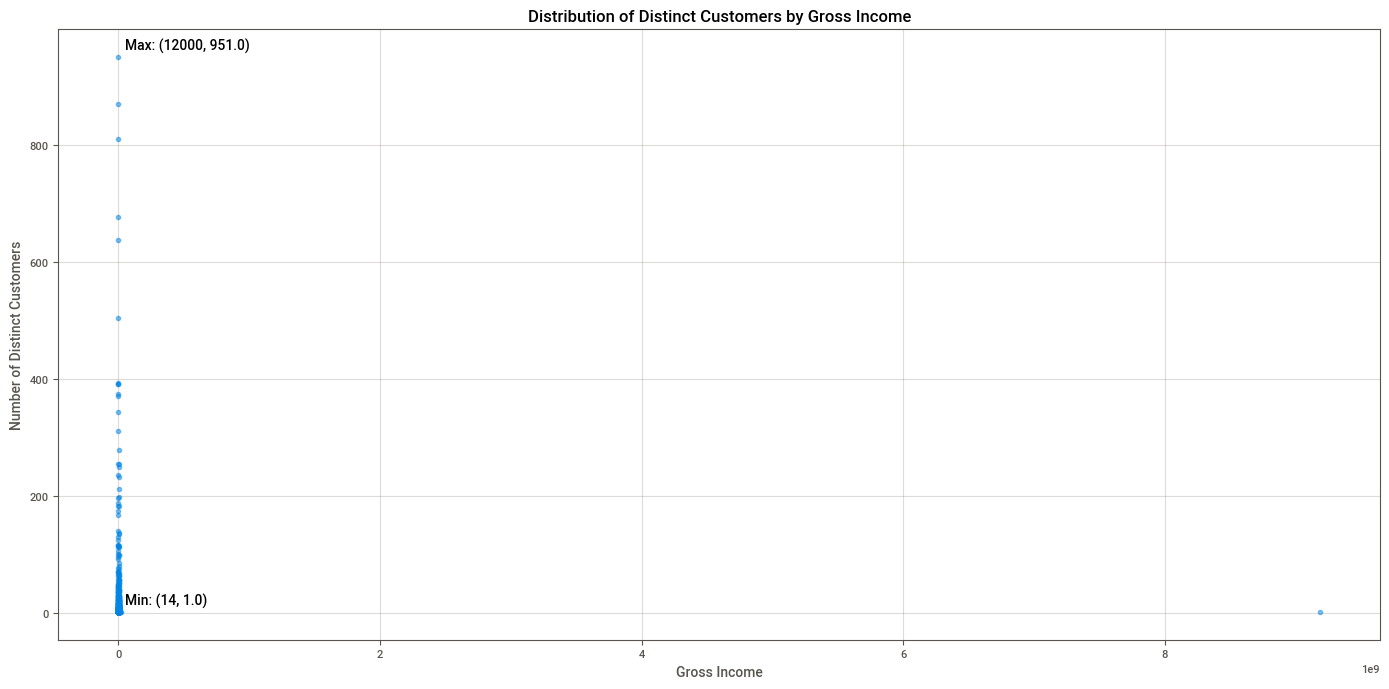

In [27]:

# Remove zeros from GrossIncome and drop duplicates based on CustomerId
sorted_data = employmentdata[employmentdata['GrossIncome'] > 0].drop_duplicates(subset='customerId')

# Group by GrossIncome and count distinct customers
income_customer_counts = sorted_data.groupby('GrossIncome')['customerId'].nunique().reset_index()

# Create the scatter plot
plt.figure(figsize=(14, 7))
plt.scatter(income_customer_counts['GrossIncome'], income_customer_counts['customerId'], alpha=0.5)
plt.title('Distribution of Distinct Customers by Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Number of Distinct Customers')
# plt.xscale('log')  # Use log scale for x-axis due to potential large range of incomes
plt.grid(True, which="both", ls="-", alpha=0.2)

# Add annotations for some points (e.g., max and min)
max_point = income_customer_counts.loc[income_customer_counts['customerId'].idxmax()]
min_point = income_customer_counts.loc[income_customer_counts['customerId'].idxmin()]

plt.annotate(f"Max: ({max_point['GrossIncome']:.0f}, {max_point['customerId']})",
             xy=(max_point['GrossIncome'], max_point['customerId']),
             xytext=(5, 5), textcoords='offset points')

plt.annotate(f"Min: ({min_point['GrossIncome']:.0f}, {min_point['customerId']})",
             xy=(min_point['GrossIncome'], min_point['customerId']),
             xytext=(5, 5), textcoords='offset points')

plt.tight_layout()

# Save the plot as an SVG
plt.savefig('distinct_customers_income_scatter.svg', format='svg')

# Print some statistics
print(f"Total distinct income levels: {len(income_customer_counts)}")
print(f"Maximum customers at one income level: {max_point['customerId']} (Income: {max_point['GrossIncome']:.2f})")
print(f"Minimum customers at one income level: {min_point['customerId']} (Income: {min_point['GrossIncome']:.2f})")

<Axes: xlabel='OccupationDesc'>

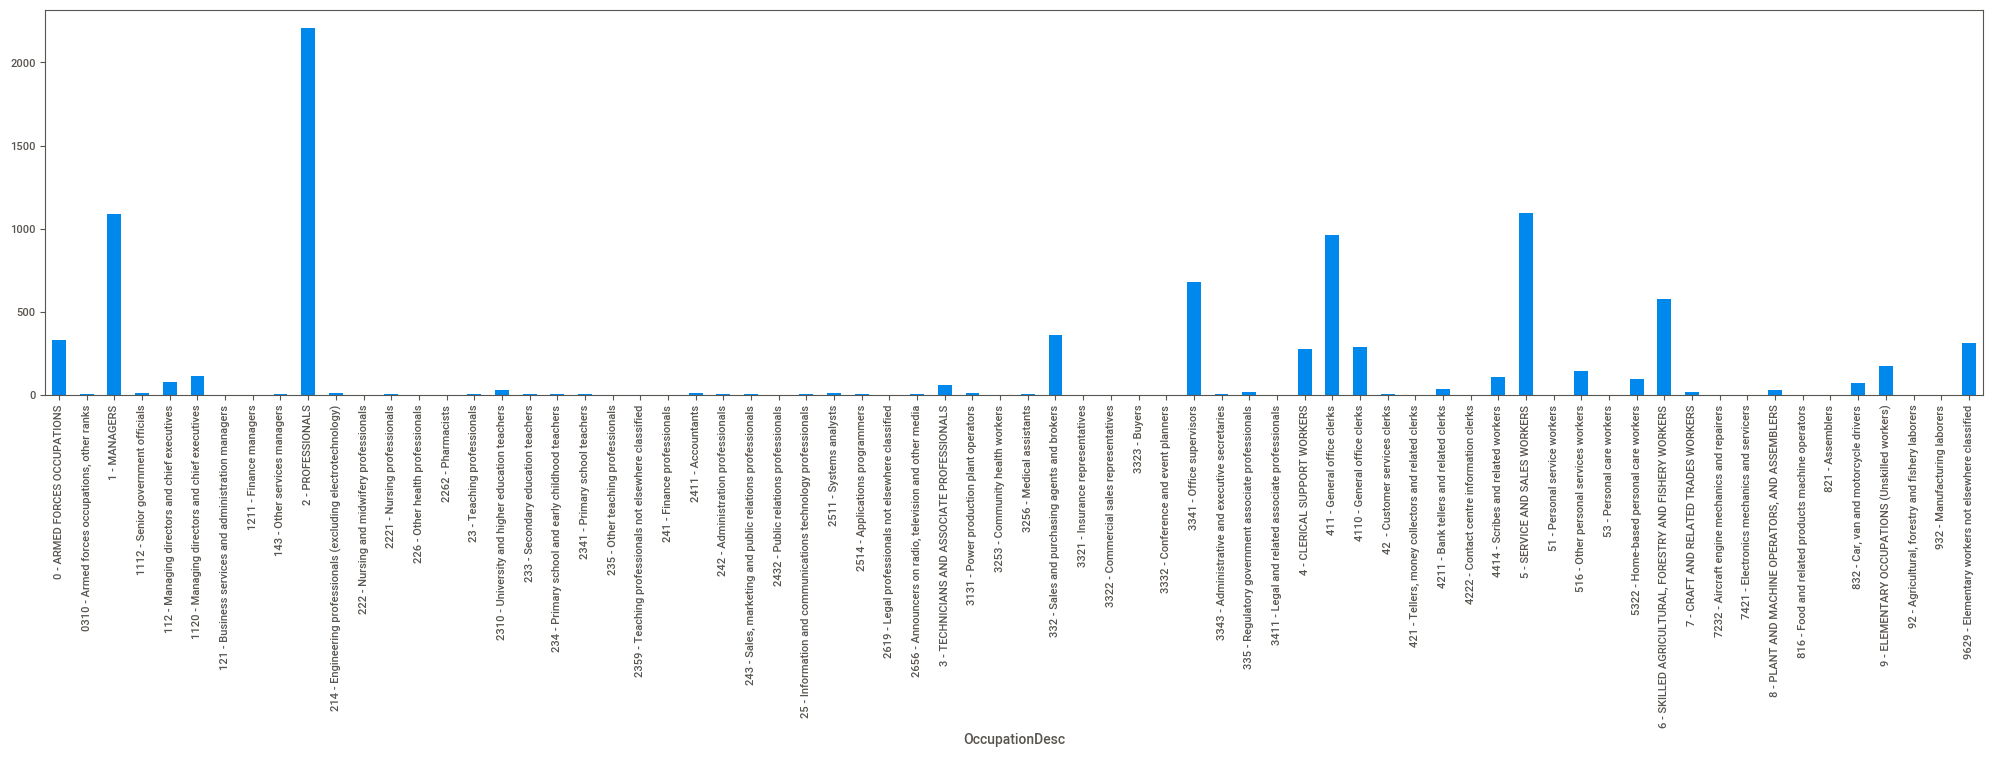

In [43]:
employmentdata.groupby('OccupationDesc')['customerId'].nunique().plot(kind = 'bar', figsize = (25,5))

<Axes: xlabel='OccupationStatusDesc'>

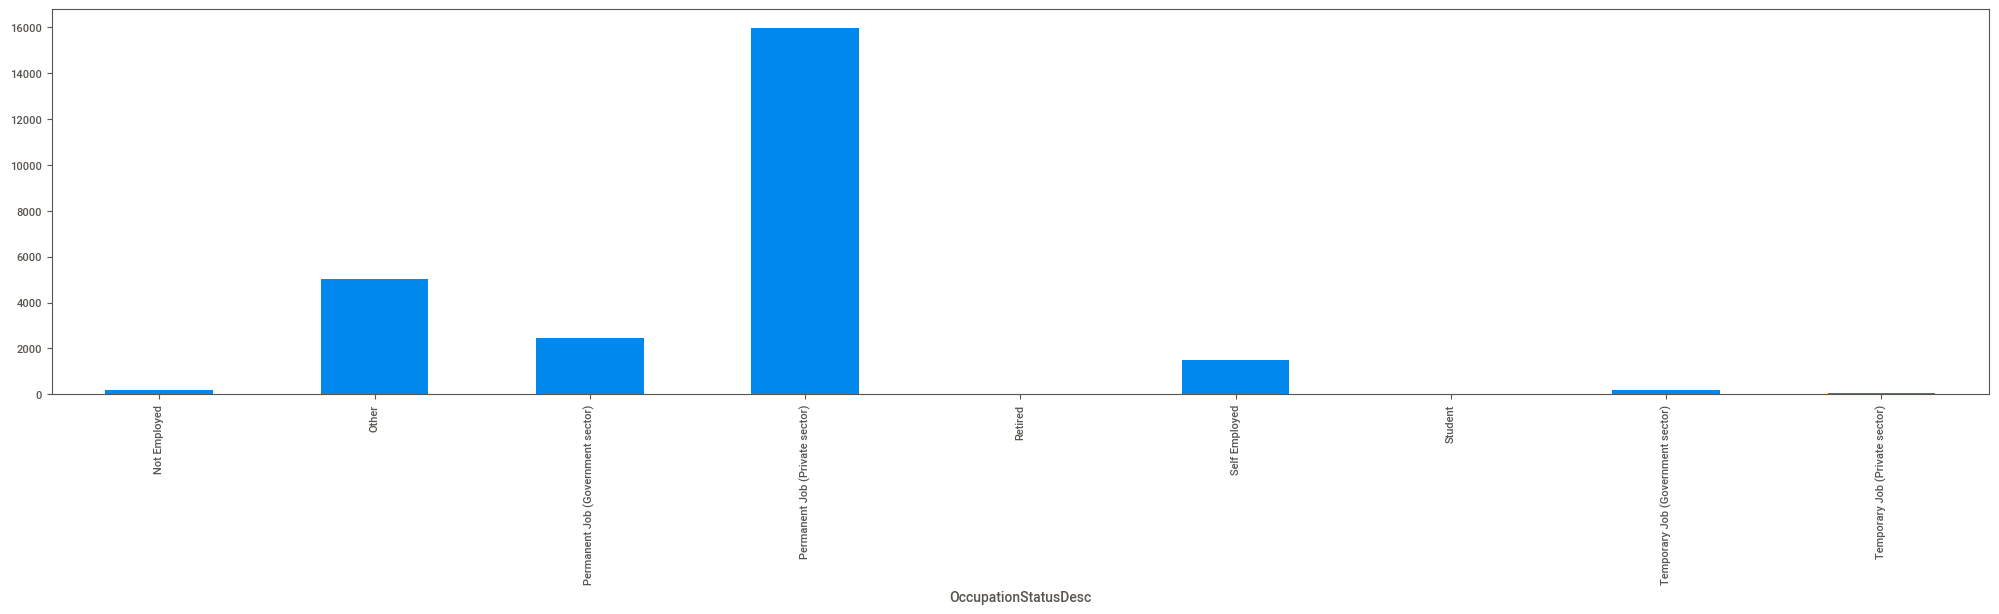

In [44]:
# OccupationStatus

employmentdata.groupby('OccupationStatusDesc')['customerId'].nunique().plot(kind = 'bar', figsize = (25,5))
